In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import seaborn as srn
from scipy import stats

plt.style.use('ggplot')

C:\Users\Caio\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# #leitura variáveis de ambiente
# load_dotenv()
# ds_path = os.getenv("TV_SHOW_PATH")

df = pd.read_csv("vgsales.csv")

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df['Year'] = df['Year'].astype('Int64')

In [5]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Lançamentos por ano

In [6]:
year = df['Year'].value_counts()

Text(0.5, 1.0, 'Lançamento de jogos ao longo dos anos')

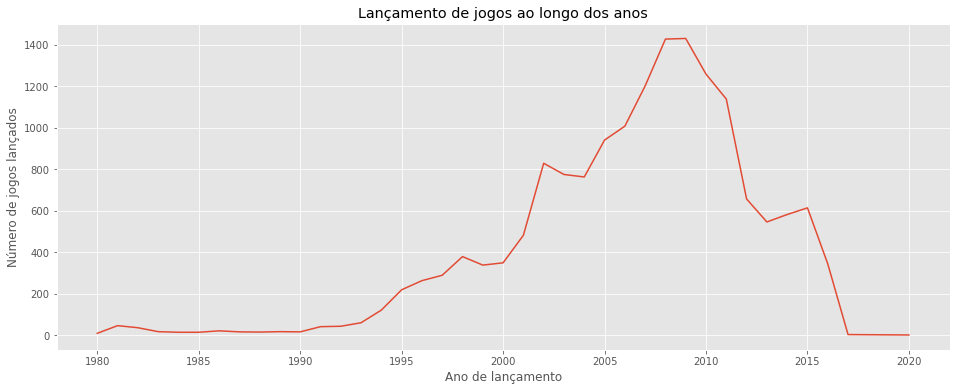

In [7]:
plt.figure(figsize=(16,6))
srn.lineplot(x=year.index, y=year)
plt.xlabel("Ano de lançamento")
plt.ylabel("Número de jogos lançados")
plt.title("Lançamento de jogos ao longo dos anos")

# Gêneros

In [8]:
genres = df['Genre'].value_counts()

In [9]:
genres

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

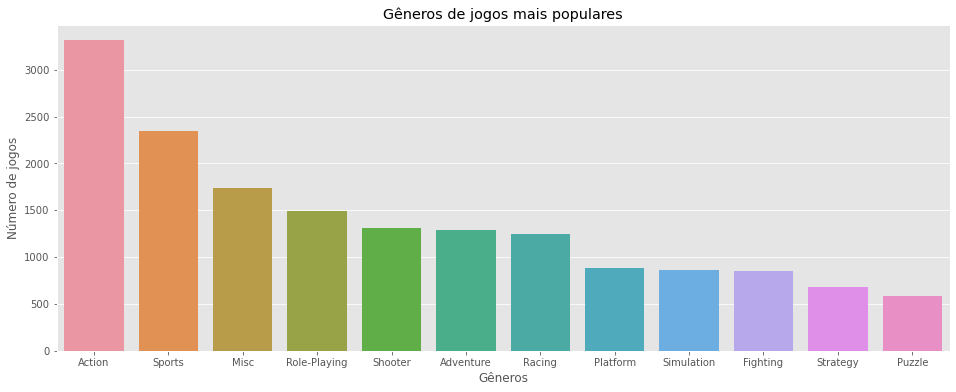

In [10]:
plt.figure(figsize=(16,6))
srn.barplot(x=genres.index, y=genres.values)
plt.xlabel("Gêneros")
plt.ylabel("Número de jogos")
plt.title("Gêneros de jogos mais populares")
plt.show()

# Vendas por gênero

In [11]:
genre_sales = df.groupby('Genre').agg('sum')[["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]]
genre_sales = genre_sales.sort_values('Global_Sales', ascending=False)
genre_sales.drop(columns=['Global_Sales'], inplace=True)

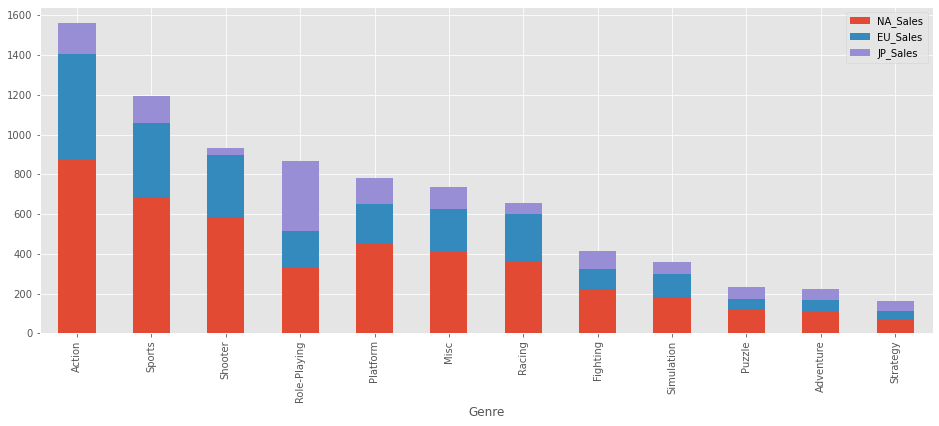

In [12]:
genre_sales.plot(kind='bar', stacked=True, figsize=(16,6))
plt.show()

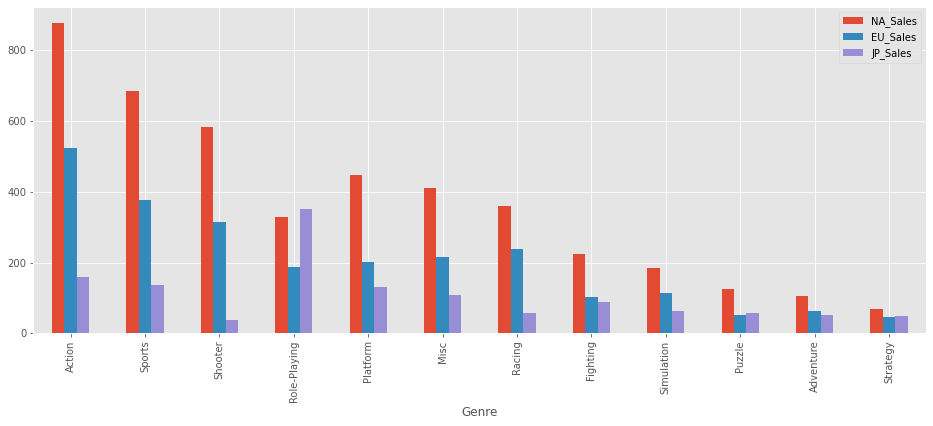

In [13]:
genre_sales.plot(kind='bar', figsize=(16,6))
plt.show()

# Ano x Gênero

In [27]:
year_genre = pd.pivot_table(df, values='Global_Sales', index=['Year'],columns=['Genre'], aggfunc=np.sum)

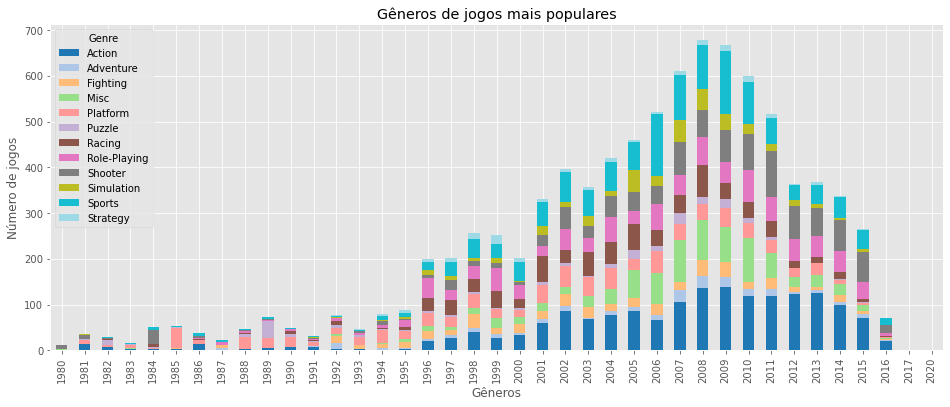

In [38]:
cmap = srn.color_palette('Greens_r')
year_genre.plot(kind='bar', stacked=True, figsize=(16,6), cmap='tab20')
plt.xlabel("Gêneros")
plt.ylabel("Número de jogos")
plt.title("Gêneros de jogos mais populares")
plt.show()